# 1. 통계적 가설검 검증
 - ** DDA / EDA / CDA / PDA
 * CDA(확증적 데이터 분석) : 통게적 가설검증 기법
 * P.value(확률값)를 통해 가설이 참인지 거짓인지 확인하는 분석기법
 
 - ** 통계적 가설 검정 **
 - 귀무가설 : 대립가설의 반대가설 (보통가설/일반적상태)
 - 대림가설 : 내가 의심하는 상태 / 내가 규명하고자 하는 가설
 
 - P.value(확률값) : 귀무가설이 참일 확률 (0~1)
 - 유의 수준 : 가설검정 판단의 기준 (0.05) 5%
     - P.value > 0.05 : 귀무가설 참 (귀무가설기각 실패)
     - P.value < 0.05 : 대립가설 참 (귀무가설기각)
 <br/><br/>
     
 - Ex) 고객 성별에 따라서 매출액에 차이가 있는가?
     - 귀무가설 : 고객 성별에 따른 매출액의 평균 차이가 없을 것이다.
     - 대립가설 : 고객 성별에 따른 매출액의 평균 차이가 있을 것이다.
     - Two T-Test --> P.value 0.03
     - P.value < 0.05 : 귀무가설기각 (대립가설 참)
     - 결론: 고객 성별에 따른 매출액의 평균 차이가 있을 것이다.
<br/><br/>     
     
     
- 단일변수
    - 연속형 : 정규성 검정 / One Sample T test(1표본 평균 검정)
        - 예) 시험결과 전체평균보다 높은가 낮은가
    - 범주형 : 비율 검정
        - 예) 남자, 여자 비율이 같은가 다른가

- 다변수
    - X 범주형 / Y 연속형 : Two Sample T Test / 등분산 검정 (분산이 같다/아니다) ... >>> Y가 정규분포
                           비모수적 검정 >>> Y가 비정규분포
                           참조) 3집단 경우 아노바
    - X 범주형 / Y 범주형 : Chi Square Test
    - X 연속형 / Y 연속형 : 상관분석 / 회귀분석
    - X 연속형 / Y 범주형 : Logistic 분석

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

In [3]:
df1=pd.read_csv('..\SampleData\DataStation\Shop_Data03.csv')
df1.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


#### 가, 정규성 검정

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


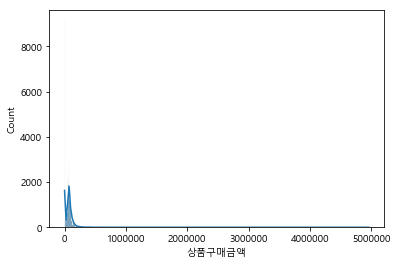

In [6]:
# 정규성 검정  - 상품 구매 금액 분포

sns.histplot(data=df1, x='상품구매금액', kde=True)     # kde(확률분포) / 즉 정규분포 띄고 있지 않다.

In [7]:
import scipy.stats as stats    # 싸이파이

In [8]:
# 귀무가설 : 해당 연속형 데이터 분포는 정규분포이다.
# 대림가설 : 해당 연속형 데이터 분포는 정규분포를 띄지 않을 것이다.

stats.normaltest(df1['상품구매금액'])   # 정규성검정

NormaltestResult(statistic=86347.36471094817, pvalue=0.0)

In [11]:
# P.value 0.0 < 0.05 (귀무가설기각, 대립가설 참)
# 해당 연속형 데이터 분포는 정규분포를 띄지 않을 것이다.

In [9]:
df2=pd.read_csv('..\SampleData\DataStation\Feature01.csv', encoding='cp949')
df2.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


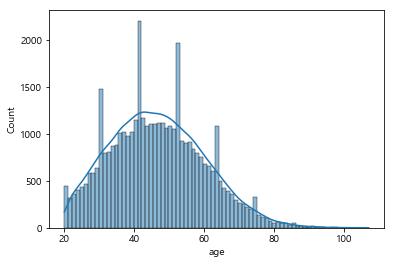

In [10]:
sns.histplot(data=df2, x='age', kde=True)

In [20]:
# 귀무가설 : age 데이터는 정규분포를 뛸것이다.
# 대림가설 : age 데이터는 정규뷴포를 띄지 않을것이다.

stats.normaltest(df2['age'].dropna())

NormaltestResult(statistic=808.6960154009449, pvalue=2.476803125887823e-176)

In [11]:
# P.value < 0.05 (귀무가설 기각, 대람가설 참) / age 데이터는 정규뷴포를 띄지 않는다.

#### 나. One Sample T Test (일표본 평균검정)

- 귀무가설 : A값은 집단의 평균과 같다.
- 대림가설 : A값은 집단의 평균과 다르다.

    - 예) 나의 수능점수가 평균과 같다/다르다.

In [12]:
df1=pd.read_csv('..\SampleData\DataStation\Feature01.csv', encoding='cp949')
df1.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [24]:
df1['amount'].mean()      # 평균

93994.98002105099

In [25]:
df1['amount'].median()     # 중앙값

96900.0

In [29]:
cond1=(df['type_of_contract']=='멤버십')
df1_member=df1.loc[cond1]
df1_member.head()

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
15,15,66423049,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,농협은행,정상,33.0,1571.0
16,16,66423249,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,국민은행,정상,48.0,1957.0
18,18,66423230,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,우리은행,정상,41.0,1915.0


In [30]:
stats.ttest_1samp(df1_member['amount'], 96900) 
# 귀무가설 : 96900원은 집단의 평균과 같다
# 대립가설 : 96900원은 잡단의 평균과 다르다.

Ttest_1sampResult(statistic=-367.3658662228573, pvalue=0.0)

In [31]:
# P.value < 0.05 (귀무가설기각, 대립가설 참)
df1_member['amount'].mean()

63075.94625440963

#### 다. Two Sample T Test(이표본 평균검정)
- 두 집단 평균의 차이가 있는 검정
- 집단이 서로 등분산성을 보이지 않을때
<br/><br/>

- Levene Test : 두 집단의 분산의 차이가 있는 검정
    - 귀무가설:두 집단의 분산이 같다.
    - 대립가설:두 집단의 분산이 다르다.

In [32]:
df1['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

In [35]:
cond1=(df1['type_of_contract']=='렌탈')
df1_rental=df1.loc[cond1]            # 렌탈
df1_member=df1.loc[~cond1].dropna()          # 멤버십
df1_member

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
15,15,66423049,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,농협은행,정상,33.0,1571.0
16,16,66423249,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,국민은행,정상,48.0,1957.0
18,18,66423230,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,우리은행,정상,41.0,1915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50920,50920,66442108,멤버십,TAS,R관리방판,2020-02-02,12,CMS,K1,66900,계약확정,0,없음,4.0,신한은행,정상,33.0,1577.0
51010,51010,66162246,멤버십,TAS,R관리방판,2020-02-02,12,CMS,K1,66900,계약확정,0,없음,3.0,신한은행,정상,63.0,2552.0
51066,51066,66349630,멤버십,TAS,R관리방판,2020-02-03,12,CMS,K1,66900,해약확정,0,없음,4.0,씨티은행,해약,53.0,1938.0
51166,51166,66178014,멤버십,TAS,R관리방판,2020-02-03,12,CMS,K1,66900,계약확정,0,없음,1.0,유안타증권,정상,37.0,1601.0


In [37]:
# 두 집단의 등분산 검정 분산의 차이
# 귀무가설 : 렌탈 그룹과 멤버십 그룹의 amout 값의 분산의 차이가 없다.
# 대립가설 : 렌탈 그룹과 멤버십 그룹의 amout 값의 분산의 차이가 있다.

stats.levene(df1_rental['amount'], df1_member['amount'])

LeveneResult(statistic=952.8818778814929, pvalue=3.2088467868188773e-207)

In [38]:
# p.value < 0.05 (귀무가설 기각, 대립가설 참)
# 렌탈 그룹과 멤버십 그룹의 amout 값의 분산의 차이가 있다.
print(df1_rental['amount'].var())
print(df1_member['amount'].var())

144928790.0446055
14989768.519928247


In [39]:
# 이표본 평균검정
# 귀무가설 : 렌탈그룹과 멤버십 그룹의 amount 평균값의 차이가 없다.
# 대립가설 : 렌탈그룹과 멤버십 그룹의 amount 평균값의 차이가 있다.
stats.ttest_ind(df1_rental['amount'], df1_member['amount'])

Ttest_indResult(statistic=112.53349600842841, pvalue=0.0)

In [40]:
# p.value < 0.05 (귀무가설 기각, 대립가설 참)
# 렌탈 그룹과 멤버십 그룹의 amout 평균값의 분산의 차이가 있다.
print(df1_rental['amount'].mean())
print(df1_member['amount'].mean())

97200.31561283105
67100.63882063882


#### 다. Chi Square Test
- 두 범주형 집단의 독립성
- 귀무가설 : A항목과 B항목은 서로 독립적이다. (연관성이 없다)
- 대립가설 : A항목과 B항목은 서로 의존적이다. (연관성이 있다.)
- 예) 성별에 따라서 합격 여부가 있나? 없나?
      작업자에 따라서 공정성이 있나? 없나?

In [41]:
df1['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

In [42]:
df1['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

- Contngency Table / 빈도수 테이블

In [44]:
df1_crosstable=pd.crosstab(df1['type_of_contract'], df1['product'])
df1_crosstable

product,K1,K2,K3,K4,K5,K6
type_of_contract,,,,,,
렌탈,34427,8892,2076,320,645,120
멤버십,4704,103,5,7,0,0


In [45]:
# 귀무가설 : 계약유형에 따라서 제품군의 차이가 없다. (계약유형과 제품군은 서로 독립)
# 대립가설 : 계약유형에 따라서 제품군의 차이가 있다. (계약유형과 제품군은 서로 연관)

stats.chi2_contingency(df1_crosstable)

(1340.8053403924034,
 9.218461328024673e-288,
 5,
 array([[3.54550553e+04, 8.15001462e+03, 1.88551200e+03, 2.96281799e+02,
         5.84409053e+02, 1.08727266e+02],
        [3.67594474e+03, 8.44985380e+02, 1.95488002e+02, 3.07182011e+01,
         6.05909472e+01, 1.12727344e+01]]))

In [47]:
# 통계량, pvalue, 자유도, 기대값

# p.value < 0.05 (귀무가설 기각, 대립가설 참)
# 약유형에 따라서 제품군의 차이가 있다. (계약유형과 제품군은 서로 연관)

- 결론
    - One smaple t Test : 하나의 값과 하나의 집단의 평균 검정
    - two sample t Test : 두 집단 간 평균 검정
    - leven Test : 두 집단 간 분산검정
    - chi^2 Test : 두 집단 간 독립검정